# 제 7 장 __비지도학습의 이해와 활용__
___

## __사전설정__
---

(1) 저장소 데이터 가져오기

In [ ]:
!rm -rf /content/BizDataAnalysis/

In [1]:
!git clone https://github.com/BizStat/BizDataAnalysis.git

Cloning into 'BizDataAnalysis'...
remote: Enumerating objects: 204, done.
remote: Counting objects: 100% (30/30), done.
remote: Compressing objects: 100% (28/28), done.
remote: Total 204 (delta 8), reused 24 (delta 2), pack-reused 174
Receiving objects: 100% (204/204), 124.36 MiB | 20.40 MiB/s, done.
Resolving deltas: 100% (61/61), done.
Updating files: 100% (51/51), done.



(2) matplotlib 환경에서 한글 사용

In [2]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -f -v
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (9,788 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 121918 files and dire

런타임 메뉴에서 '세션 다시 시작' 후 다음의 명령문 실행

In [1]:
from matplotlib import rc
rc('font', family='NanumGothicCoding')
rc('axes', unicode_minus=False)

(3) 구글 드라이브 연결

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

___

## 7.1 __차원축소의 이해와 활용__

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### (1) 주성분 분석 사례 : Red Wine Qulaity data

* 데이터 가져오기

In [ ]:
wine = pd.read_table('/content/BizDataAnalysis/DATA/winequality-red.csv',sep=',')

In [ ]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
wine.shape

(1599, 12)

* 데이터 살펴보기

In [ ]:
import seaborn as sns
sns.pairplot(wine.iloc[:,1:], hue="quality")
plt.show()

* 분석 데이터

In [ ]:
X = wine.iloc[:,0:-1]

In [ ]:
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


* 주성분 수 결정

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)

StandardScaler()

In [ ]:
for i in range(0,len(scaler.feature_names_in_)):
  print(f'{scaler.feature_names_in_[i]} : {scaler.mean_[i]}')

fixed acidity : 8.31963727329581
volatile acidity : 0.5278205128205128
citric acid : 0.2709756097560976
residual sugar : 2.53880550343965
chlorides : 0.08746654158849279
free sulfur dioxide : 15.874921826141339
total sulfur dioxide : 46.46779237023139
density : 0.9967466791744841
pH : 3.3111131957473416
sulphates : 0.6581488430268917
alcohol : 10.422983114446529


In [ ]:
for i in range(0,len(scaler.feature_names_in_)):
  print(f'{scaler.feature_names_in_[i]} : {scaler.var_[i]}')

fixed acidity : 3.0295205688671114
volatile acidity : 0.0320423261333205
citric acid : 0.03792375112494089
residual sugar : 1.9866539202698996
chlorides : 0.0022137573233114347
free sulfur dioxide : 109.34645676374501
total sulfur dioxide : 1081.42563558916
density : 3.5598017926307083e-06
pH : 0.023820274241131787
sulphates : 0.02871464701398349
alcohol : 1.1349371714889036


In [ ]:
Xt = scaler.transform(X)

In [ ]:
from sklearn.decomposition import PCA
wine_pca = PCA()
wine_pca.fit(Xt)

PCA()

In [ ]:
wine_pca.explained_variance_

array([3.10107182, 1.92711489, 1.55151379, 1.21399175, 0.95989238,
       0.66002104, 0.58415655, 0.42322138, 0.34485779, 0.18144664,
       0.05959558])

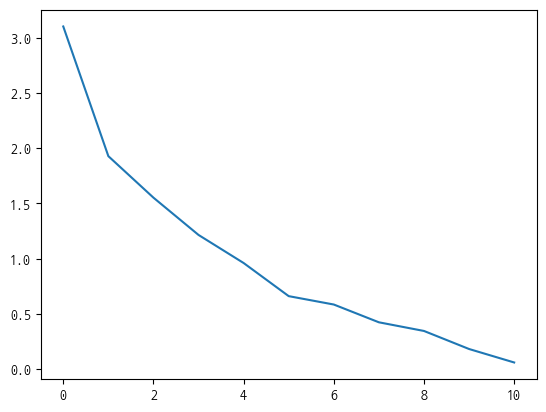

In [ ]:
plt.plot(wine_pca.explained_variance_)
plt.show()

* 주성분 분석 결과 탐색

In [ ]:
wine_pca.components_

array([[ 0.48931422, -0.23858436,  0.46363166,  0.14610715,  0.21224658,
        -0.03615752,  0.02357485,  0.39535301, -0.43851962,  0.24292133,
        -0.11323206],
       [-0.11050274,  0.27493048, -0.15179136,  0.27208024,  0.14805156,
         0.51356681,  0.56948696,  0.23357549,  0.00671079, -0.03755392,
        -0.38618096],
       [-0.12330157, -0.44996253,  0.23824707,  0.10128338, -0.09261383,
         0.42879287,  0.3224145 , -0.33887135,  0.05769735,  0.27978615,
         0.47167322],
       [-0.22961737,  0.07895978, -0.07941826, -0.37279256,  0.66619476,
        -0.04353782, -0.03457712, -0.17449976, -0.00378775,  0.55087236,
        -0.12218109],
       [-0.08261366,  0.21873452, -0.05857268,  0.73214429,  0.2465009 ,
        -0.15915198, -0.22246456,  0.15707671,  0.26752977,  0.22596222,
         0.35068141],
       [ 0.10147858,  0.41144893,  0.06959338,  0.04915555,  0.30433857,
        -0.01400021,  0.13630755, -0.3911523 , -0.52211645, -0.38126343,
         0.361

In [ ]:
Xprj = wine_pca.transform(Xt)
Xprj.shape

(1599, 11)

In [ ]:
Xprj


array([[-1.61952988,  0.45095009, -1.77445415, ...,  0.00509804,
        -0.26775943,  0.04863012],
       [-0.79916993,  1.85655306, -0.91169017, ..., -0.52070667,
         0.06283285, -0.13814189],
       [-0.74847909,  0.88203886, -1.17139423, ..., -0.08685693,
        -0.18744237, -0.11822866],
       ...,
       [-1.45612897,  0.31174559,  1.12423941, ..., -0.80877339,
         0.24224843, -0.40291033],
       [-2.27051793,  0.97979111,  0.62796456, ..., -0.61224806,
         0.77940384,  0.04092255],
       [-0.42697475, -0.53669021,  1.6289552 , ...,  0.40430898,
         0.77943963, -0.44978056]])

In [ ]:
Xprj[:,0:2]

In [ ]:
wine = wine.assign(PC1=Xprj[:,0],PC2=Xprj[:,1])

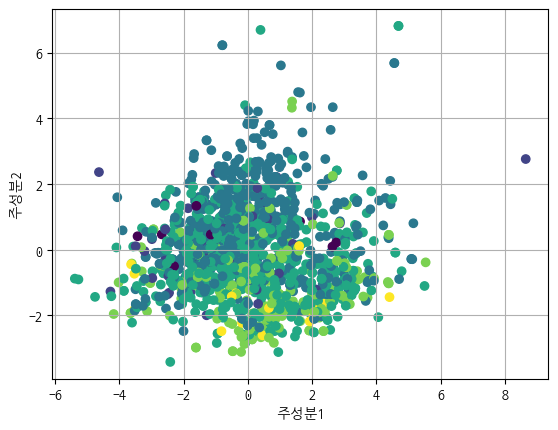

In [ ]:
plt.scatter(wine['PC1'],wine['PC2'],c=wine['quality'])
plt.xlabel("주성분1")
plt.ylabel("주성분2")
plt.grid()
plt.show()

In [24]:
#@title PCA 결과 시각화를 위한 biplot 함수 (출처: https://sukhbinder.wordpress.com/2015/08/05/biplot-with-python/)
def biplot(score,coeff,pcax,pcay,labels=None):
  pca1=pcax-1
  pca2=pcay-1
  xs = score[:,pca1]
  ys = score[:,pca2]
  n=score.shape[1]
  scalex = 1.0/(xs.max()- xs.min())
  scaley = 1.0/(ys.max()- ys.min())
  plt.scatter(xs*scalex,ys*scaley)
  for i in range(n):
    plt.arrow(0, 0, coeff[i,pca1], coeff[i,pca2],color='r',alpha=0.5)
    if labels is None:
      plt.text(coeff[i,pca1]* 1.15, coeff[i,pca2] * 1.15, "Var"+str(i+1), color='g', ha='center', va='center')
    else:
      plt.text(coeff[i,pca1]* 1.15, coeff[i,pca2] * 1.15, labels[i], color='g', ha='center', va='center')
  plt.xlim(-1,1)
  plt.ylim(-1,1)
  plt.xlabel("주성분{}".format(pcax))
  plt.ylabel("주성분{}".format(pcay))
  plt.grid()

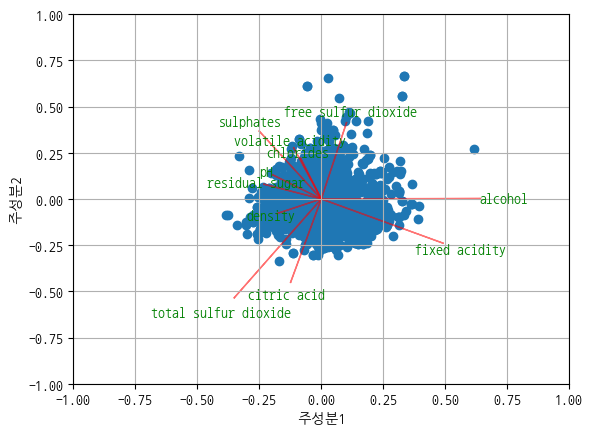

In [ ]:
biplot(Xprj, wine_pca.components_, 1, 2, labels=scaler.feature_names_in_)

### (2) 주성분 분석 사례 : Boston house-price data

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [10]:
boston = pd.read_table('/content/BizDataAnalysis/DATA/Boston.txt',sep='\s+')

In [16]:
X = boston.iloc[:,0:13]

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)

StandardScaler()

In [19]:
Xt = scaler.transform(X)

In [21]:
from sklearn.decomposition import PCA
boston_pca = PCA()
boston_pca.fit(Xt)

PCA()

In [23]:
Xprj = boston_pca.transform(Xt)
Xprj.shape

(506, 13)

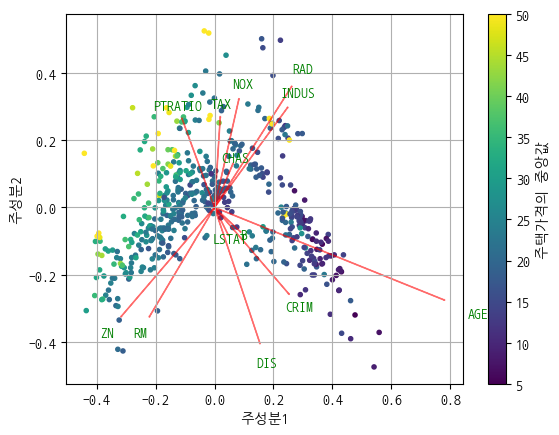

In [41]:
score = Xprj
coeff = boston_pca.components_
pcax = 1
pcay = 2
labels=scaler.feature_names_in_

pca1=pcax-1
pca2=pcay-1
xs = score[:,pca1]
ys = score[:,pca2]
n=score.shape[1]
scalex = 1.0/(xs.max()- xs.min())
scaley = 1.0/(ys.max()- ys.min())
plt.scatter(xs*scalex,ys*scaley,c=boston['MEDV'],s=3**2)
for i in range(n):
  plt.arrow(0, 0, coeff[i,pca1], coeff[i,pca2],color='r',alpha=0.5)
  if labels is None:
    plt.text(coeff[i,pca1]* 1.15, coeff[i,pca2] * 1.15, "Var"+str(i+1), color='g', ha='center', va='center')
  else:
    plt.text(coeff[i,pca1]* 1.15, coeff[i,pca2] * 1.15, labels[i], color='g', ha='center', va='center')
plt.colorbar(label='주택가격의 중앙값')
plt.xlabel("주성분{}".format(pcax))
plt.ylabel("주성분{}".format(pcay))
plt.grid()